In [1]:
%reset -f          
%matplotlib inline   

import math
import numpy as np
import matplotlib.pyplot as plt

Error for step size 0.1 at t=1 is 0.023390565039838274
Error for step size 0.1 at t=Δt is 0.004482165038591779
Error for step size 0.01 at t=1 is 0.0022627524869450744
Error for step size 0.01 at t=Δt is 4.666463267022358e-05
Error for step size 0.001 at t=1 is 0.00022550837717016936
Error for step size 0.001 at t=Δt is 4.6853911972455364e-07
Error for step size 0.0001 at t=1 is 2.2543165543398302e-05
Error for step size 0.0001 at t=Δt is 4.6872890013816004e-09


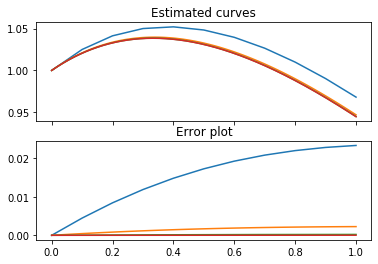

In [3]:
# An example of Euler's method.

# derivative function
def f(t, y):
    return y * (1 - 3*t) / (4 + 4*t)

# solution function
def y(t):
    return (t + 1) * np.exp(-3 * t / 4)

# function to produce estimates using Euler method
# inputs are the derivative function, vector of equally spaced steps along t, timestep size, initial value
def Euler(f, t, Δt, y_t_min):
    Nt = len(t)        # number of points in t
    ys = np.zeros(Nt)  # initialize a vector to store the estimates
    ys[0] = y_t_min    # set first point to initial value
    
    # the for loop will run the Euler algorithm
    for i in range(1, Nt):
        ys[i] = ys[i-1] + Δt * f(t[i-1], ys[i-1])
    return ys

t_min = 0.; t_max = 1.; y_t_min = 1. # setting the interval t in [0,1] and starting value

t_Euler = {}          # initialize dictionary to store points in t with different time steps
y_Euler = {}          # initialize dictionary to store Euler estimates with different time steps
errors = {}           # initialize dictionary to store error of the estimates with different time steps

for Δt in [0.1, 0.01, 0.001, 0.0001]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)  # create points in the interval [0,1] based on time step
    ys = Euler(f, ts, Δt, y_t_min)                                 # create the Euler estimates    
    t_Euler[Δt] = ts                                               # store the vector of points in t for plotting
    y_Euler[Δt] = ys                                               # store the Euler estimates for plotting
    y_exact = y(ts)
    errors[Δt] = ys - y_exact

fig, (ax1, ax2) = plt.subplots(2, sharex=True)   # create 2 plots using the same x-axis
ax1.set_title('Estimated curves')                                 
ax2.set_title('Error plot');
    
for Δt in reversed(sorted(t_Euler)):
    ax1.plot(t_Euler[Δt], y_Euler[Δt])           # plot the estimated curves   
    ax2.plot(t_Euler[Δt], errors[Δt])            # plot the errors of the esimated curve

for Δt in reversed(sorted(errors)):
    print("Error for step size", Δt, "at t=1 is", errors[Δt][-1]) 
    print("Error for step size", Δt, "at t=Δt is", errors[Δt][1])

Error for step size 0.1 at t=1 is 0.00055924688908493
Error for step size 0.1 at t=Δt is 0.0001355741295010482
Error for step size 0.01 at t=1 is 5.90467620653623e-06
Error for step size 0.01 at t=Δt is 1.6091979904153675e-07
Error for step size 0.001 at t=1 is 5.935616986807446e-08
Error for step size 0.001 at t=Δt is 1.6374501754512494e-10
Error for step size 0.0001 at t=1 is 5.938728397936188e-10
Error for step size 0.0001 at t=Δt is 1.6409096303959814e-13


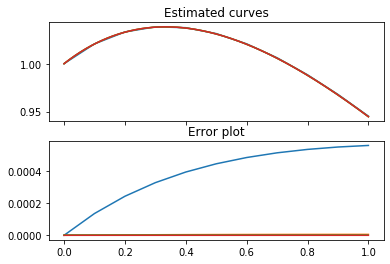

In [4]:
# An example of RK2, a.k.a. Heun's method.

# The inputs as per Euler example:

def f(t, y):
    return y * (1 - 3*t) / (4 + 4*t)

def y(t):
    return (t + 1) * np.exp(-3 * t / 4)

def rk2(f, ts, Δt, t_min, y_t_min):
    Nt = len(ts)
    ys = np.zeros(Nt)
    ys[0] = y_t_min
    for i in range(1, Nt):
        k1 = Δt * f(ts[i-1], ys[i-1])
        k2 = Δt * f(ts[i], ys[i-1] + k1)
        ys[i] = ys[i-1] + 0.5 * (k1 + k2)
    return ys

t_min = 0.; t_max = 1.; y_t_min = 1.

ts_rk2 = {}
ys_rk2 = {}
errors = {}
for Δt in [0.1, 0.01, 0.001, 0.0001]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)
    ys = rk2(f, ts, Δt, t_min, y_t_min)
    ts_rk2[Δt] = ts
    ys_rk2[Δt] = ys
    y_exact = y(ts)
    errors[Δt] = ys - y_exact

fig, (ax1, ax2) = plt.subplots(2, sharex=True)   # create 2 plots using the same x-axis
ax1.set_title('Estimated curves')                                 
ax2.set_title('Error plot');
    
for Δt in reversed(sorted(ts_rk2)):
    ax1.plot(ts_rk2[Δt], ys_rk2[Δt])             # plot the estimated curves   
    ax2.plot(ts_rk2[Δt], errors[Δt])             # plot the errors of the esimated curve
    
for Δt in reversed(sorted(errors)):
    print("Error for step size", Δt, "at t=1 is", errors[Δt][-1]) 
    print("Error for step size", Δt, "at t=Δt is", errors[Δt][1])

In [5]:
# An example of solving a linear system of equation by using the inverse of the matrix A in Ax = b

A = np.array([[2., 4.], [2., -4.]])
b = [2., -6.]
Ainv = np.linalg.inv(A)   # inv function within the numpy.linalg module finds the inverse of a matrix
print('The inverse matrix of A = \n', Ainv)
x = Ainv @ b
print('x vector = ', x)

The inverse matrix of A = 
 [[ 0.25   0.25 ]
 [ 0.125 -0.125]]
x vector =  [-1.  1.]


In [2]:
# An example of using LU Decomposition to solve Ax = b in two steps

# Construct the diagonals of matrix A
d0 = [2.,4.,3.]     # main diagonal
d1 = [3.,1.]        # super diagonal
dm1 = [3.,1.]       # sub diagonal

# Construct RHS of equation Ax = b
b = np.array([8.,14.,11.])

# Perform LU Decomposition on matrix A
for i in range(1,len(d0)):
    # Reusing the same arrays to store the diagonals of matrix L and U
    # dm1 being the sub diagonal of L
    # d0 and d1 being the diagonal and super diagonal of U
    dm1[i-1] = dm1[i-1] / d0[i-1]
    d0[i] = d0[i] - dm1[i-1]*d1[i-1]

# Solving for y in Ly = b using forward substitution
y = b.copy()    # creates a shallow copy array of the right size for y and first element is already correct
for i in range(len(y)-1):
    y[i+1] = b[i+1] - dm1[i]*y[i]   # algorithm on last line of forward subtitution slide
    
# Solving for x in Ux = y using backward substitution
x =  y.copy() / d0[-1]     # creates array of right size for x & first element is already the correct solution i.e. y3/d3                            
for i in range(len(x)-1):
    x[-(i+2)] = (y[-(i+2)] - d1[-(i+1)]*x[-(i+1)]) / d0[-(i+2)]     # algorithm on last line of backward subtitution slide
                                                                    # x[-1] is the index for last element of x 
        
# alternative way to loop backwards
#for i in range(len(x)-1, 0, -1):
#    x[i-1] = (y[i-1] - d1[i-1]*x[i]) / d0[i-1]  # remember that d1 has 1 element because it is the super-diagonal
    
print('The solution (x y z) =', x)

The solution (x y z) = [1. 2. 3.]


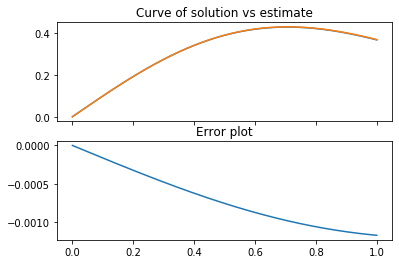

In [3]:
# An example of solving 2nd Order Linear ODEs with LU Decomposition

def LUSolve(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2):
    N = int((b-a)/Δx) + 1
    xs = np.linspace(a, b, N)
    
    # Set up matrix diagonals
    d0 = f1(xs) - 2.*f3(xs)/(Δx**2)
    d1 = f2(xs[0:-1])/(2.*Δx) + f3(xs[0:-1])/(Δx**2)
    dm1 = -f2(xs[1:])/(2.*Δx) + f3(xs[1:])/(Δx**2)
    
    # First Boundary Condition
    d0[0] = g1 - g2/Δx
    d1[0] = g2/Δx
    
    # Second Boundary Condition
    d0[-1] = k2/Δx
    dm1[-1] = k1 - k2/Δx

    # Perform LU Decomposition
    for i in range(1,len(d0)):
        dm1[i-1] = dm1[i-1] / d0[i-1]
        d0[i] = d0[i] - dm1[i-1]*d1[i-1]

    # Construct the RHS of the equation Ay = z which we will solve for y
    z = f0(xs)
    z[0] = g0
    z[-1] = k0

    # A decomposed to LUy = z and first step is to solve Lw = z before solving Uy = w
    
    # Solving for w using forward substitution
    w = z.copy()
    for i in range(len(w)-1):
        w[i+1] = z[i+1] - dm1[i]*w[i]
        
    # Solving for y using backward substitution
    y =  w.copy() / d0[-1]
    for i in range(len(y)-1):
        y[-i-2] = (w[-i-2] - d1[-i-1]*y[-i-1]) / d0[-i-2]

    return y

# Input parameters for the following example on the interval [0,1]:
#   x^2*exp(x^2)*y(x) + 2*x*exp(x^2)*y'(x) + exp(x^2)*y''(x) = x^3 - 4*x
#   y(0) = 0
#   y'(1) = -1/e

# f0(x) = x^3 - 4*x
def f0(x):
    return x**3 - 4.*x

# f1(x) = x^2*exp(x^2)
def f1(x):
    return x**2 * np.exp(x**2)

# f2(x) = 2*x*exp(x^2)
def f2(x):
    return 2.*x*np.exp(x**2)

# f3(x) = exp(x^2)
def f3(x):
    return np.exp(x**2)

a = 0.; b = 1.                      # x-axis boundary values
g1 = 1.; g2 = 0.; g0 = 0.           # Left boundary condition
k1 = 0.; k2 = 1.; k0 = -1./math.e   # Right boundary condition
Δx = 0.001

# generate estimated solution, subtract actual solution and plot error
y_estd = LUSolve(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)
xs = np.linspace(a, b, int((b-a)/Δx)+1)
def f(x):
    return x*np.exp(-x**2)
y_actual = f(xs)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(xs, y_estd, xs, y_actual)
ax1.set_title('Curve of solution vs estimate')
ax2.plot(xs, y_estd - y_actual)
ax2.set_title('Error plot');

Estimate of n is: 0.9770963743515741


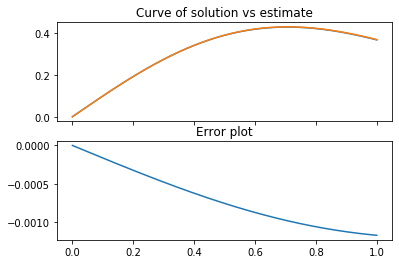

In [34]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# An example of solving 2nd Order Linear ODEs using scipy solver

def gen_matrix(xs, f1, f2, f3, g0, g1, g2, k0, k1, k2):
    Δx = xs[1] - xs[0] # Otherwise the list of inputs is too long
    N = len(xs)
    
    # Set up matrix diagonals
    d0 = f1(xs) - 2.*f3(xs)/(Δx**2)
    d1 = f2(xs[0:-1])/(2.*Δx) + f3(xs[0:-1])/(Δx**2)
    dm1 = -f2(xs[1:])/(2.*Δx) + f3(xs[1:])/(Δx**2)
    
    # First Boundary Condition
    d0[0] = g1 - g2/Δx
    d1[0] = g2/Δx
    
    # Second Boundary Condition
    d0[-1] = k2/Δx
    dm1[-1] = k1 - k2/Δx
    
    # Construct matrix
    A = diags([dm1,d0,d1], [-1, 0, 1], shape=(N,N), dtype=float)
    A = A.tocsr() # Solving algorithm more efficient with CSR or RSR format

    return A

def gen_solution(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2):
    N = int((b-a)/Δx) + 1
    xs = np.linspace(a, b, N)
    A = gen_matrix(xs, f1, f2, f3, g0, g1, g2, k0, k1, k2)
    
    # Construct the RHS of the equation Ay = z which we will solve for y
    z = f0(xs)
    z[0] = g0
    z[-1] = k0
    
    y = spsolve(A, z) # Solve the equation Ay = z for y
    return y 

# Input parameters for the following example on the interval [0,1]:
#   x^2*exp(x^2)*y(x) + 2*x*exp(x^2)*y'(x) + exp(x^2)*y''(x) = x^3 - 4*x
#   y(0) = 0
#   y'(1) = -1/e

# f0(x) = x^3 - 4*x
def f0(x):
    return x**3 - 4.*x

# f1(x) = x^2*exp(x^2)
def f1(x):
    return x**2 * np.exp(x**2)

# f2(x) = 2*x*exp(x^2)
def f2(x):
    return 2.*x*np.exp(x**2)

# f3(x) = exp(x^2)
def f3(x):
    return np.exp(x**2)

a = 0.; b = 1.                 # x-axis boundary values
g1 = 1.; g2 = 0.; g0 = 0.      # Left boundary condition
k1 = 0.; k2 = 1.; k0 = -1./math.e   # Right boundary condition
Δx = 0.001

# generate estimated solution, subtract actual solution and plot error
y_estd = gen_solution(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)
xs = np.linspace(a, b, int((b-a)/Δx)+1)
def f(x):
    return x*np.exp(-x**2)
y_actual = f(xs)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(xs, y_estd, xs, y_actual)
ax1.set_title('Curve of solution vs estimate')
ax2.plot(xs, y_estd - y_actual)
ax2.set_title('Error plot')

# for next exercise
Δx = 0.0025
y_estd_Δx  = gen_solution(   Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)
y_estd_Δx = y_estd_Δx[-1]
y_estd_2Δx = gen_solution(2.*Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)[-1]
y_estd_4Δx = gen_solution(4.*Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)[-1]
n = math.log( (y_estd_4Δx - y_estd_2Δx) / (y_estd_2Δx - y_estd_Δx), 2)
print("Estimate of n is:", n)

Error for step size 0.2 at t=1 is 0.04845809243463728
Error for step size 0.1 at t=1 is 0.023390565039838274
Error for step size 0.05 at t=1 is 0.0114837760214066
Error for Richardson Extrapolation at t=1 is -0.0016769623549607315


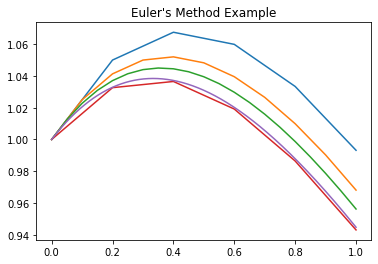

In [9]:
# An example of Euler's method with Richardson Extrapolation.

# derivative function
def f(t, y):
    return y * (1 - 3*t) / (4 + 4*t)

# solution function
def y(t):
    return (t + 1) * np.exp(-3 * t / 4)

# function to produce estimates using Euler method
# inputs are the derivative function, vector of equally spaced steps along t, timestep size, initial value
def Euler(f, t, Δt, y_t_min):
    Nt = len(t)        # number of points in t
    ys = np.zeros(Nt)  # initialize a vector to store the estimates
    ys[0] = y_t_min    # set first point to initial value
    
    # the for loop will run the Euler algorithm
    for i in range(1, Nt):
        ys[i] = ys[i-1] + Δt * f(t[i-1], ys[i-1])
    return ys

t_min = 0.; t_max = 1.; y_t_min = 1. # setting the interval t in [0,1] and starting value

y_t_max = y(t_max)    # exact solution of y(1) using the solution function to check for error
t_Euler = {}          # initialize dictionary to store points in t with different time steps
y_Euler = {}          # initialize dictionary to store Euler estimates with different time steps
errors = {}           # initialize dictionary to store error of the estimates with different time steps

for Δt in [0.2, 0.1, 0.05]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)  # create points in the interval [0,1] based on time step
    ys = Euler(f, ts, Δt, y_t_min)                                 # create the Euler estimates
    t_Euler[Δt] = ts                                               # store the vector of points in t for plotting
    y_Euler[Δt] = ys                                               # store the Euler estimates for plotting

# plot the curves and calculate the error of the final estimate for y(1) for each time step
for Δt in reversed(sorted(t_Euler)):
    ys = y_Euler[Δt]
    plt.plot(t_Euler[Δt], ys)                   
    errors[Δt] = math.fabs(ys[-1] - y_t_max)
    
plt.title("Euler's Method Example")

# calculate the estimates using Richardson extrapolation and store it in y_RE
y_RE = 2*y_Euler[0.1][::2] - y_Euler[0.2]
error_RE = y_RE[-1] - y_t_max
plt.plot(t_Euler[0.2],y_RE)

ts = np.linspace(t_min, t_max, 1000)
ys = y(ts)
plt.plot(ts,ys)

for Δt in reversed(sorted(errors)):
    print("Error for step size", Δt, "at t=1 is", errors[Δt])
print("Error for Richardson Extrapolation at t=1 is", error_RE) 